# All it takes is 2 minutes
(but we're going to take 5)

Deep breath...
Inhale
Exhale

### You're more ready than Spongebob !
Have confidence in it!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import tree
# import graphviz
from sklearn import metrics 

%matplotlib inline

In [3]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [2]:
raw = pd.read_csv('train.csv')
working_df = raw
raw.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Find the missing data

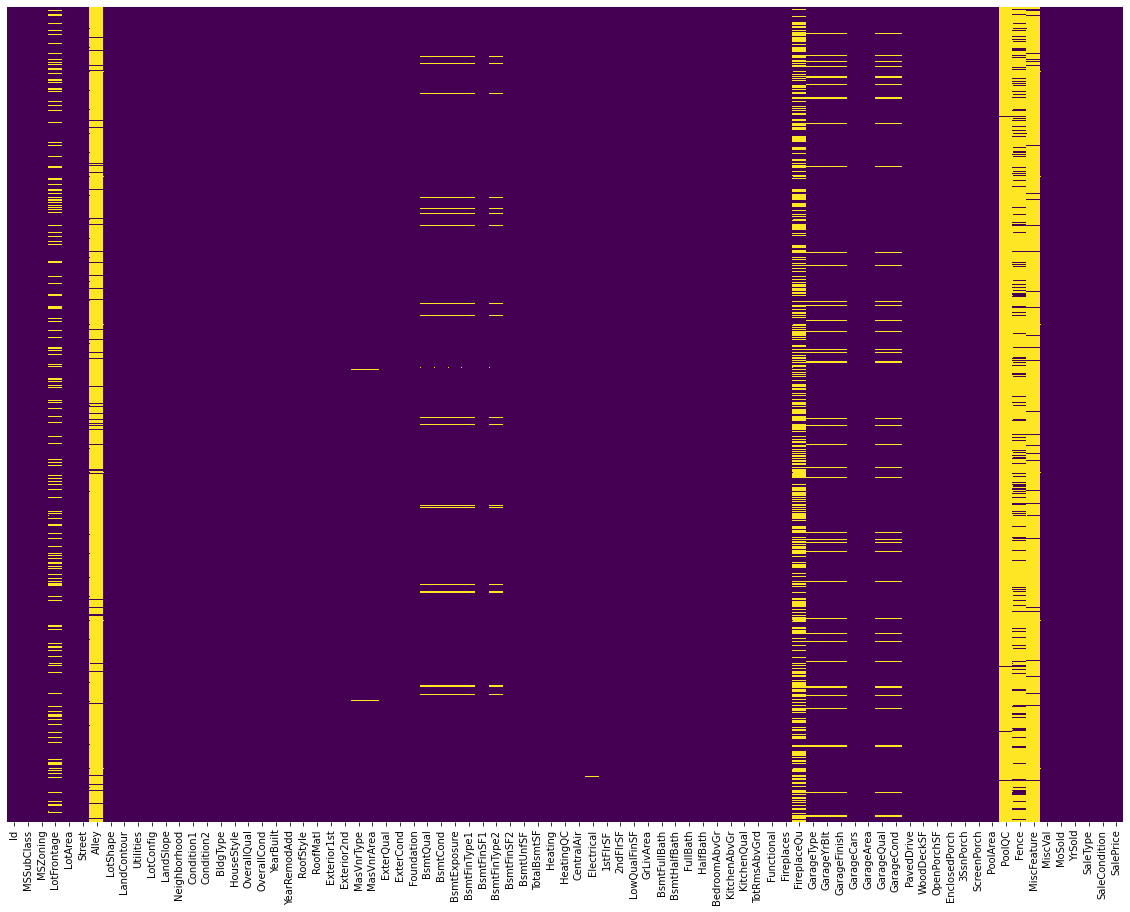

In [6]:
raw.isnull()
heatmap, ax2 = plt.subplots(figsize = (20,15))
ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# with open('data_description.txt') as f:
#     lines = f.readlines()
# lines

In [8]:
len(raw.columns)

81

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

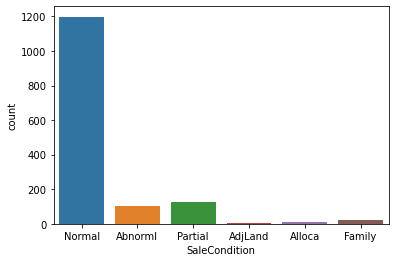

In [9]:
sns.countplot(data=raw, x='SaleCondition')

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

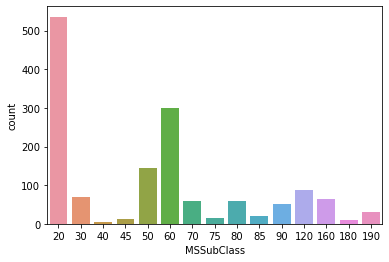

In [10]:
sns.countplot(data=raw, x='MSSubClass')

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

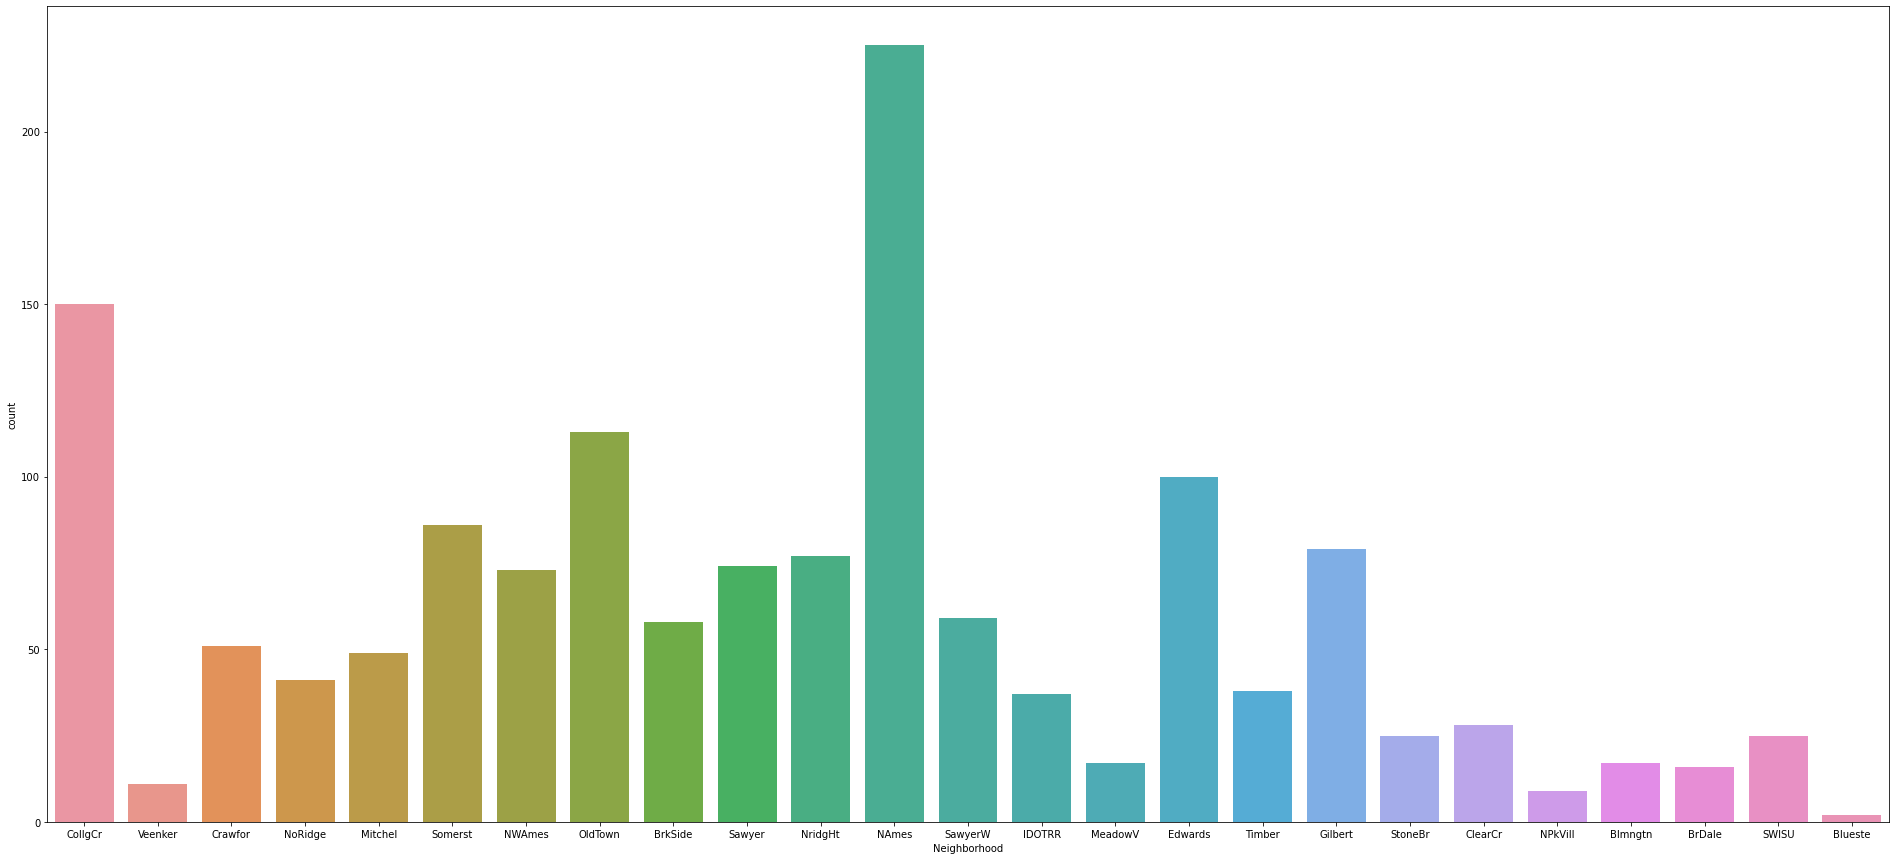

In [12]:
# the areas sold the most

countplt, ax = plt.subplots(figsize = (33,15))
ax=sns.countplot(data=raw, x='Neighborhood', orient='v')

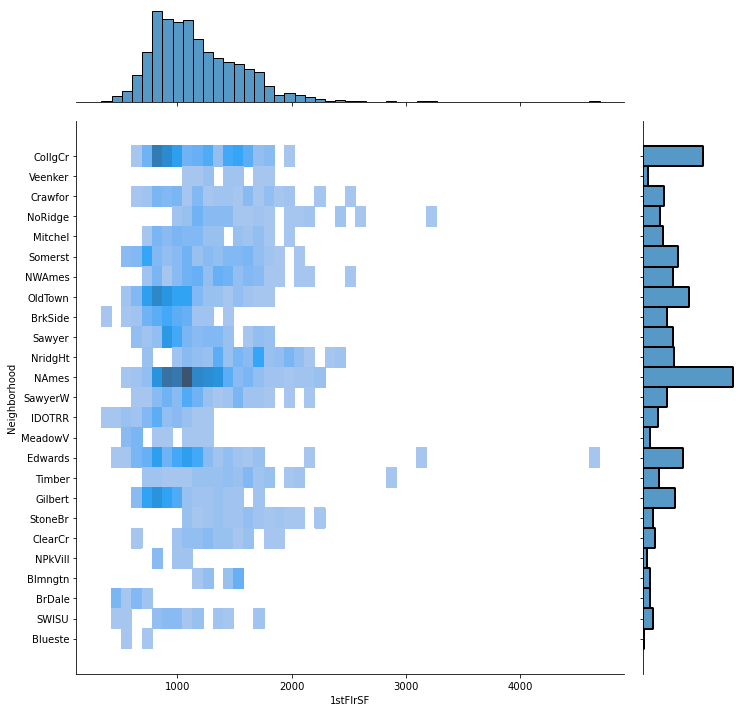

In [13]:
sns.jointplot(data=raw, x='1stFlrSF', y='Neighborhood',kind='hist',height=10)

In [14]:
# sns.jointplot(data=raw, x='SaleType', y='Neighborhood',kind='hex',height=10)
# sns.

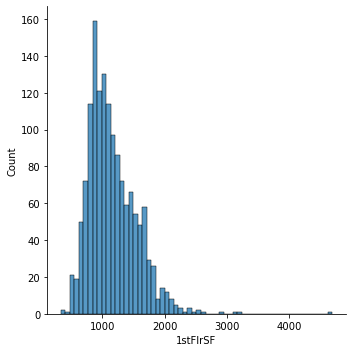

In [15]:
sns.displot(raw['1stFlrSF'],bins=60)

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

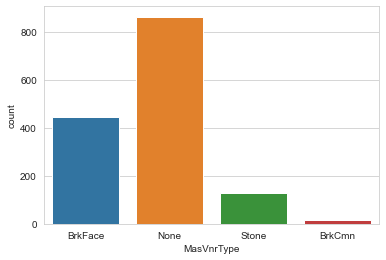

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='MasVnrType', data=raw)

# Feature Engineeering

 ### Dealing with N/a 's
 List all of the columns that have N/a as an option

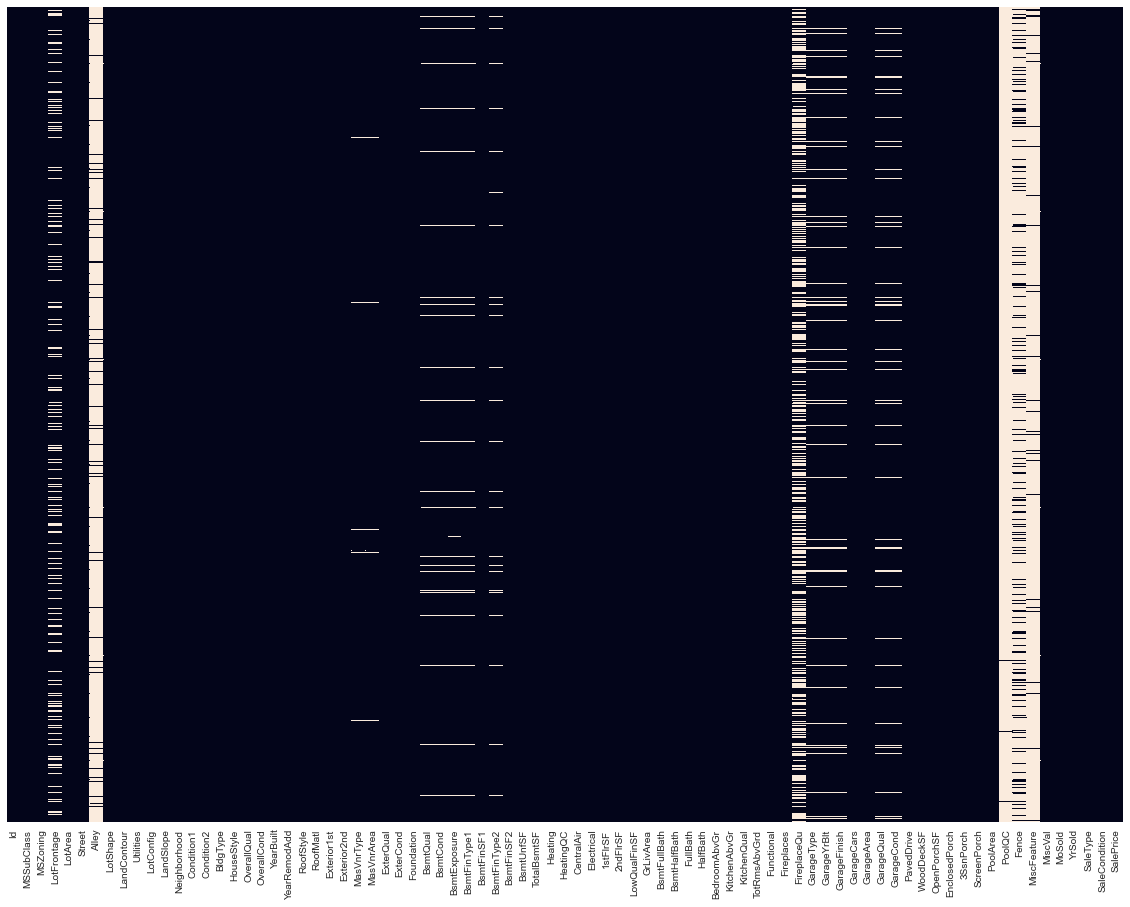

In [17]:
raw.isnull()
heatmap, ax2 = plt.subplots(figsize = (20,15))
# ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap='YlGnBu
ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False)

## N/A COLUMN NAMES
* LotFrontage: Linear feet of street connected to property
* Alley 
    *  = No alley access
* MasVnrType: Masonry veneer type
    * 
* MasVnrArea
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Electrical
* FireplaceQu
* GarageType
* GarageYrBlt
* GarageFinish
* GarageQual
* GarageCond
* PoolQC
* Fence
* MiscFeature

In [18]:
# Note:
# In each column the N/a means something different. To get the correct data meaning 
# we need to properly replace the N/a values with their corresponding meaning
# researching the column category (ie. Lot frontage) may be neccessary to find that desired cooresponding value




In [19]:
# raw["GarageYrBlt"].max()
# raw["GarageYrBlt"].min()
# raw['FireplaceQu']

# raw['LotFrontage'].isna().sum()
# raw.loc[raw["GarageType"]== 'CarPort', "GarageYrBlt" ] #float("nan")

## try to see how you can see the garageYrBlt for all garageTypes that have n/a
# raw.loc[raw["GarageType"]== "Attchd", "GarageYrBlt" ].isna().sum()


# pd.DataFrame(raw.isna().sum())
# raw['LotFrontage'].isna()



In [20]:
working_df = raw

def fixNa(df):

    naMeanings = {
        "LotFrontage":0 ,"Alley": "notIncluded","MasVnrType": "notIncluded",
        "BsmtQual": "notIncluded","BsmtCond":"notIncluded",
        "BsmtExposure": "notIncluded","BsmtFinType1": "notIncluded",
        "BsmtFinType2": "notIncluded","FireplaceQu":"notIncluded",
        "GarageType": "notIncluded","GarageYrBlt": "notIncluded",
        "GarageFinish": "notIncluded","GarageQual": "notIncluded",
        "GarageCond": "notIncluded","PoolQC": "notIncluded",
        "Fence": "notIncluded","MiscFeature": "notIncluded"
    }
    
    for col in naMeanings:
        df[col].fillna(naMeanings[col], inplace=True)
        
    return df
working_df = fixNa(working_df)
        
working_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,notIncluded,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,notIncluded,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,notIncluded,notIncluded,notIncluded,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,notIncluded,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,notIncluded,notIncluded,notIncluded,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,notIncluded,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,notIncluded,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,notIncluded,notIncluded,notIncluded,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,notIncluded,notIncluded,notIncluded,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,notIncluded,MnPrv,notIncluded,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,

In [21]:
# Drop the missing values for these columns if the number of n/a's is less than 10
# "MasVnrArea", 
# raw.loc[raw["MasVnrType"]== 'none', "MasVnrArea" ]
# raw['MasVnrArea'].isna().sum()
working_df.dropna(axis=0, inplace = True)
working_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,notIncluded,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,notIncluded,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,notIncluded,notIncluded,notIncluded,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,notIncluded,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,notIncluded,notIncluded,notIncluded,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,notIncluded,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,notIncluded,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,notIncluded,notIncluded,notIncluded,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,notIncluded,notIncluded,notIncluded,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,notIncluded,MnPrv,notIncluded,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,notIncluded,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,

In [22]:
# working_df.isnull()
# working_df

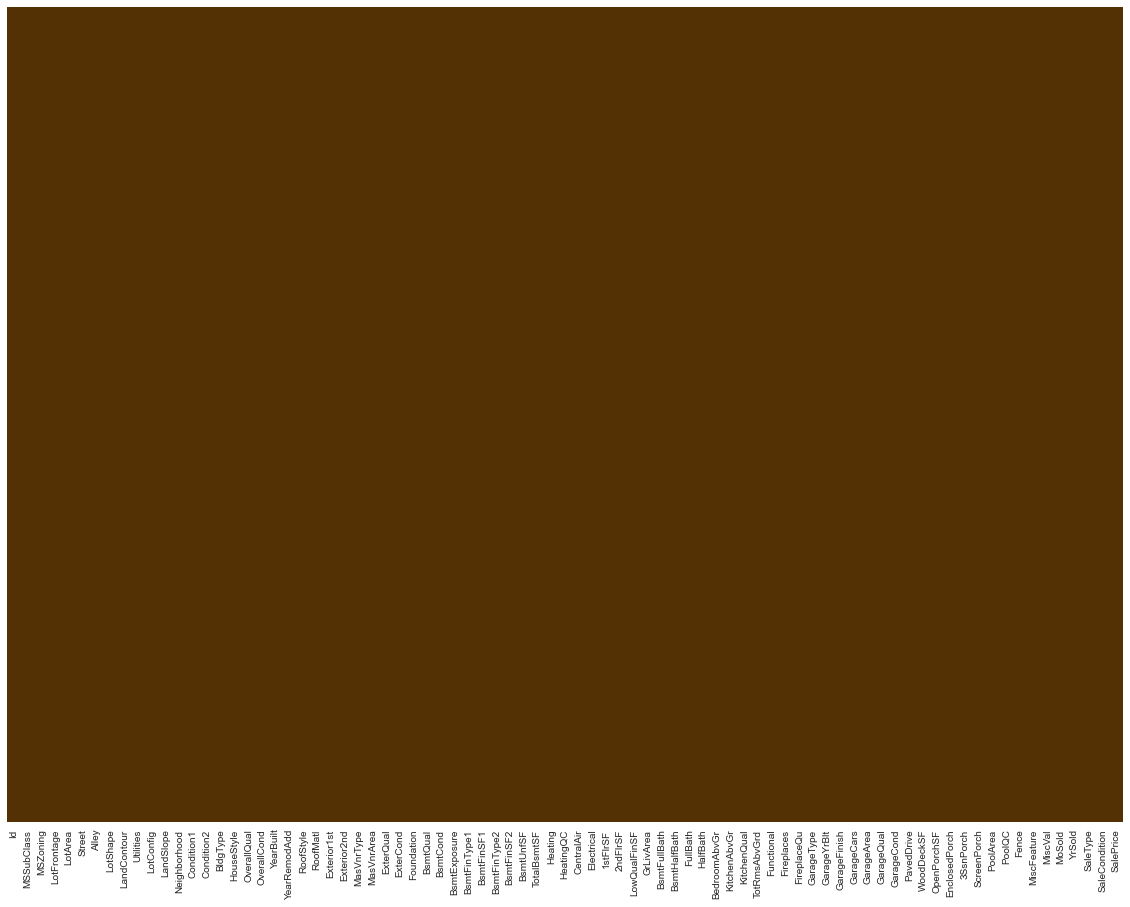

In [23]:
# should see no more N/a's 
# horray!!
heatmap, ax2 = plt.subplots(figsize = (20,15))
ax2=sns.heatmap(working_df.isnull(),yticklabels=False,cbar=False,cmap='BrBG')

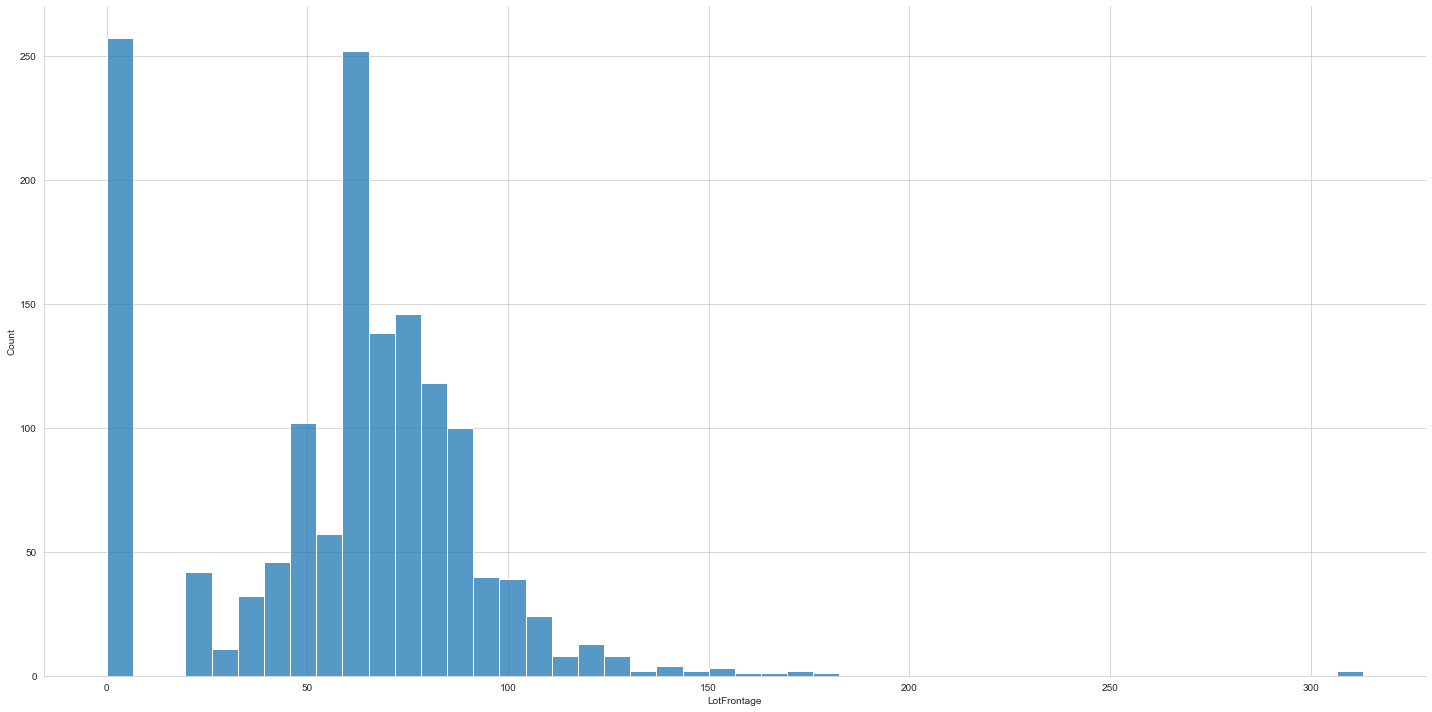

In [24]:
# find the distribution of the lot frontage data

# i may take the average as a replacements for all the 0's 
# sns.displot(data=working_df, x ="LotFrontage", kind="kde")
sns.displot(data=working_df, x ="LotFrontage", kind="hist", height=10, aspect=2)

In [25]:
# now lets feature engeneer!
"""
Recap:
- all NAs have been removed but when i replaced empty lot frontage values with 0 we now kinda have a lot of outliers
-- instead of using 0 I'll ues the mean of that feature
What's next:
- graph a corrilation plot to get rid of the corrilated features
- Handle categorical features (there's a bunch but you got it)
--- ones with only 2 options use 1-hot encoding
--- ones with 3+ options use target encoding ...provided it doesnt need the target column 
- Normalize the data

- Split the data
- train the model
- test it!! and repeat
"""

"\nRecap:\n- all NAs have been removed but when i replaced empty lot frontage values with 0 we now kinda have a lot of outliers\n-- instead of using 0 I'll ues the mean of that feature\nWhat's next:\n- graph a corrilation plot to get rid of the corrilated features\n- Handle categorical features (there's a bunch but you got it)\n--- ones with only 2 options use 1-hot encoding\n--- ones with 3+ options use target encoding ...provided it doesnt need the target column \n- Normalize the data\n\n- Split the data\n- train the model\n- test it!! and repeat\n"

In [26]:
working_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011119,-0.024121,-0.032789,-0.032075,0.013595,-0.016378,-0.025398,-0.049736,-0.006218,-0.005213,-0.007841,-0.016309,0.009820,0.006626,-0.044033,0.008606,0.001900,-0.019569,0.004834,0.004350,0.041371,0.005034,0.028894,-0.016544,0.014676,0.015772,-0.028217,-0.005435,0.004939,-0.046455,0.002058,0.057388,-0.006025,0.019499,0.002630,-0.025188
MSSubClass,0.011119,1.000000,-0.214937,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,-0.066037,-0.138789,-0.236547,-0.249775,0.307931,0.046463,0.077025,0.004115,-0.002542,0.136051,0.175813,-0.021715,0.286684,0.042300,-0.044127,-0.039167,-0.098027,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.024121,-0.214937,1.000000,0.102913,0.174317,-0.055981,0.035166,0.077282,0.105449,0.079052,-0.009355,0.159695,0.240007,0.248621,0.044248,0.050147,0.223427,0.012925,-0.027962,0.122753,-0.013435,0.148698,0.039984,0.224644,0.049420,0.164679,0.200560,-0.016202,0.065885,0.031289,0.023575,0.023042,0.114487,-0.059809,0.015888,-0.010294,0.208453
LotArea,-0.032789,-0.138039,0.102913,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,-0.004250,0.258538,0.295977,0.052979,0.004897,0.261152,0.157695,0.048365,0.122526,0.016364,0.117788,-0.024708,0.188012,0.269677,0.154761,0.180767,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,-0.032075,0.034799,0.174317,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,0.309461,0.536836,0.476645,0.299021,-0.030071,0.594431,0.108108,-0.039348,0.552939,0.272338,0.106013,-0.184799,0.430817,0.400090,0.600055,0.560502,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PoolArea,0.057388,0.008240,0.114487,0.077885,0.065720,-0.002254,0.005368,0.006198,0.011697,0.141361,0.041597,-0.035168,0.126850,0.132670,0.081794,0.062110,0.170801,0.068034,0.019926,0.050152,0.022706,0.070936,-0.014496,0.083996,0.095587,0.021155,0.061279,0.073457,0.061380,0.054383,-0.008042,0.051205,1.000000,0.029632,-0.033811,-0.059794,0.093102
MiscVal,-0.006025,-0.007773,-0.059809,0.038221,-0.031183,0.068617,-0.033994,-0.009866,-0.029854,0.003852,0.004784,-0.023884,-0.018345,-0.021003,0.016301,-0.003859,-0.002206,-0.022868,-0.007499,-0.013919,0.001603,0.007738,0.062914,0.024872,0.001461,-0.042882,-0.027251,-0.009692,-0.018380,0.018424,0.000291,0.031807,0.029632,1.000000,-0.006431,0.004947,-0.020961
MoSold,0.019499,-0.013659,0.015888,0.003177,0.068514,-0.004210,0.009756,0.018959,-0.006159,-0.016387,-0.014977,0.033297,0.011051,0.030806,0.040017,-0.022144,0.053720,-0.025223,0.033274,0.059229,-0.008363,0.052510,0.030964,0.041716,0.051730,0.039503,0.026609,0.021806,0.068319,-0.025954,0.029724,0.023606,-0.033811,-0.006431,1.000000,-0.145333,0.045085
YrSold,0.002630,-0.021583,-0.010294,-0.012969,-0.025116,0.043487,-0.014559,0.035263,-0.008147,0.016969,0.031880,-0.040340,-0.011313,-0.008965,-0.031962,-0.028943,-0.035780,0.067583,-0.046549,-0.020065,-0.010179,-0.038600,0.033964,-0.034916,-0.024834,-0.038097,-0.025723,0.021571,-0.055528,-0.008462,0.018725,0.010812,-0.059794,0.004947,-0.145333,1.000000,-0.026165


<ipython-input-27-07b08ecbfe16>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(working_df.corr(), dtype=np.bool))


<AxesSubplot:>

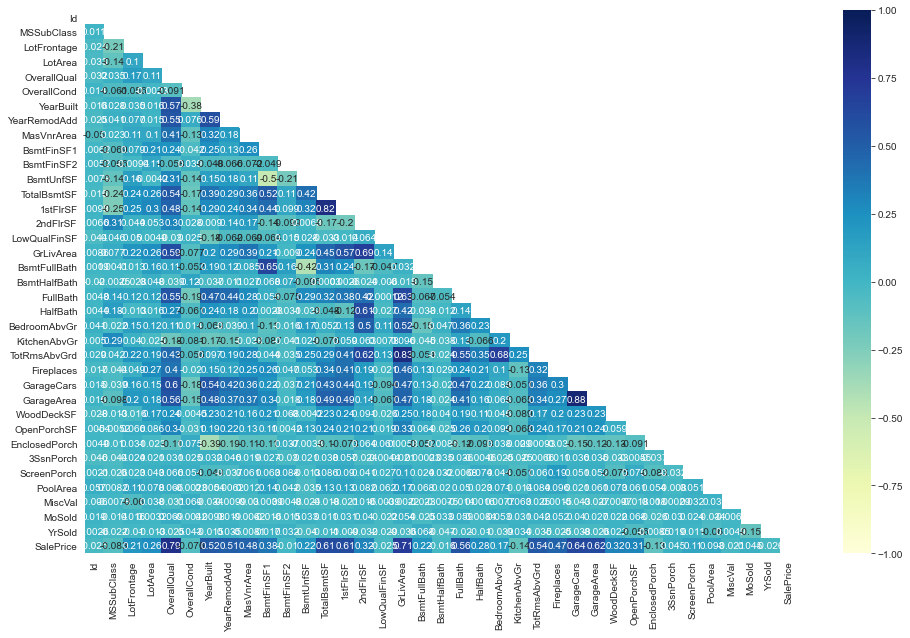

In [27]:
plt.figure(figsize=(16, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(working_df.corr(), dtype=np.bool))
sns.heatmap(working_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')


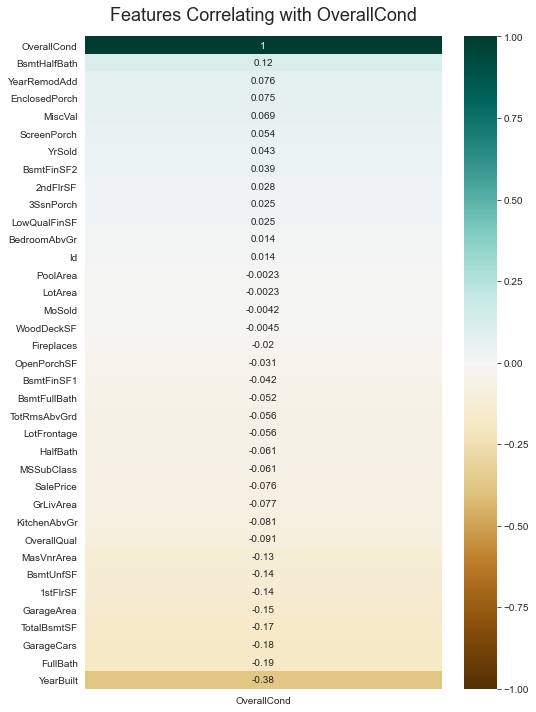

In [28]:
value = "OverallCond"
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(working_df.corr()[[value]].sort_values(by=value, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with '+ value, fontdict={'fontsize':18}, pad=16);

In [34]:
def separate_feature_data_types():
    ## separate features types
    not_strings = []
    categorical_features = []
    for i in working_df.columns:
        if working_df[i].dtype == 'int64':
            not_strings.append(i)
        elif working_df[i].dtype == 'float64':
            not_strings.append(i)
        else:
            categorical_features.append(i)

    ## store feature type and unique categories counts for categorical features
    types_list = {}
    for i in categorical_features:
        info_data = []
        info_data.append(working_df[i].nunique())
        info_data.append(working_df[i].dtype)
        types_list[i] = info_data

    for i in not_strings:
        info_data = []
        info_data.append(working_df[i].nunique())
        info_data.append(working_df[i].dtype)
        types_list[i] = info_data
    types_list

    return types_list
print(separate_feature_data_types())


{'MSZoning': [5, dtype('O')], 'Street': [2, dtype('O')], 'Alley': [2, dtype('O')], 'LotShape': [4, dtype('O')], 'LandContour': [4, dtype('O')], 'Utilities': [2, dtype('O')], 'LotConfig': [5, dtype('O')], 'LandSlope': [3, dtype('O')], 'Neighborhood': [25, dtype('O')], 'Condition1': [9, dtype('O')], 'Condition2': [8, dtype('O')], 'BldgType': [5, dtype('O')], 'HouseStyle': [8, dtype('O')], 'RoofStyle': [6, dtype('O')], 'RoofMatl': [8, dtype('O')], 'Exterior1st': [15, dtype('O')], 'Exterior2nd': [16, dtype('O')], 'MasVnrType': [4, dtype('O')], 'ExterQual': [4, dtype('O')], 'ExterCond': [5, dtype('O')], 'Foundation': [6, dtype('O')], 'BsmtQual': [4, dtype('O')], 'BsmtCond': [4, dtype('O')], 'BsmtExposure': [4, dtype('O')], 'BsmtFinType1': [6, dtype('O')], 'BsmtFinType2': [6, dtype('O')], 'Heating': [6, dtype('O')], 'HeatingQC': [5, dtype('O')], 'CentralAir': [2, dtype('O')], 'Electrical': [5, dtype('O')], 'KitchenQual': [4, dtype('O')], 'Functional': [7, dtype('O')], 'FireplaceQu': [5, dtyp

In [ ]:
# list of ordinal categories
# ones with ? may not need to be in this category

# LotShape
# LandSlope ?
# OverallQual
# OverallCond
# ExterQual
# ExterCond
# BsmtQual
# BsmtCond
# BsmtExposure
# BsmtFinType1
# BsmtFinType2
# HeatingQC
# KitchenQual
# Functional
# FireplaceQu
# GarageFinish ?
# GarageQual
# GarageCond
# PoolQC
# Fence


# list of ...